In [1]:
# Test migration history reconstruction on simulated data

import sys
import os

repo_dir = "/Users/divyakoyyalagunta/Desktop/Cornell_Research/Morris_Lab/metastatic_history_reconstruction/"
os.chdir(repo_dir)

from src.lib import vertex_labeling

from src.util import machina_data_extraction_util as mach_util
from src.util import vertex_labeling_util as vert_util
import matplotlib
import torch

SANBORN_DATA_DIR = os.path.join(repo_dir, 'src/data/sanborn_melanoma_2015')


In [2]:

def find_labeling(tree_fn, ref_var_fn, custom_colors):    
    ref_matrix, var_matrix, unique_sites, cluster_label_to_idx = mach_util.get_ref_var_matrices_from_real_data(ref_var_fn)
    print(cluster_label_to_idx)
    idx_to_label = {v:k for k,v in cluster_label_to_idx.items()}
    print(idx_to_label)
    T = torch.tensor(mach_util.get_adj_matrix_from_machina_tree(cluster_label_to_idx, tree_fn, skip_polytomies=False), dtype = torch.float32)
    B = vert_util.get_mutation_matrix_tensor(T)

    print(unique_sites)   
    primary_idx = unique_sites.index('primary')
    r = torch.nn.functional.one_hot(torch.tensor([primary_idx]), num_classes=len(unique_sites)).T

    vertex_labeling.gumbel_softmax_optimization(T, ref_matrix, var_matrix, B, ordered_sites=unique_sites, 
                                                p=r, node_idx_to_label=idx_to_label, 
                                                w_e=0.01, w_l=3, w_m=10, max_iter=100, batch_size=64, 
                                                custom_colors=custom_colors, primary="breast", show_top_trees=False)


        

{'0': 0, '1': 1, '2': 2, '3': 3}
{0: '0', 1: '1', 2: '2', 3: '3'}
seen nodes {'2', '1', '3', '0'}
dict_keys(['0', '1', '2', '3'])
['primary', 'parotid_gland', 'locoregional_1', 'locoregional_2']


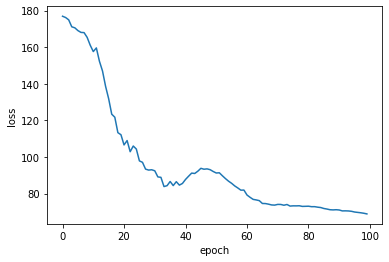

DEBUG:SGD:
Best tree
Migration number: 5.0
Comigration number: 3.0
Seeding site number: 1.0
Neg log likelihood: 10.425
L1: 4.0
Loss: 66.104
DEBUG:SGD:
U > 0.05

DEBUG:SGD:                norm     0     1     2     3
primary        0.270 0.000 0.000 0.677 0.000
parotid_gland  0.831 0.000 0.000 0.000 0.000
locoregional_1 0.613 0.160 0.000 0.099 0.081
locoregional_2 0.395 0.000 0.507 0.000 0.000
DEBUG:SGD:
F
DEBUG:SGD:tensor([[0.9470, 0.0000, 0.0000, 0.6772, 0.6772],
        [0.8315, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.9528, 0.1600, 0.0000, 0.2589, 0.3398],
        [0.9017, 0.0000, 0.5065, 0.0000, 0.5065]], grad_fn=<MmBackward0>)


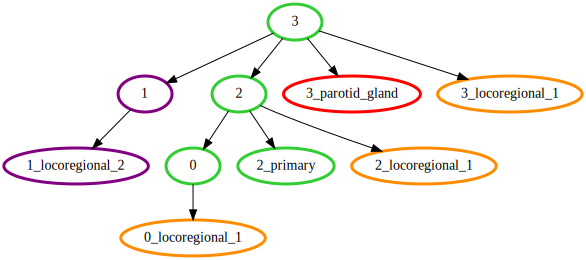

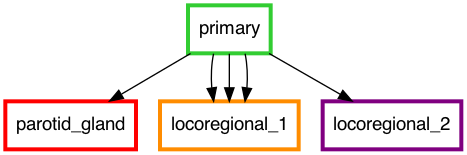

In [5]:
# Patient A
patient = "A"
custom_colors = [matplotlib.colors.to_hex(c) for c in ['limegreen', 'red', 'darkorange', 'purple']]
find_labeling(os.path.join(SANBORN_DATA_DIR, f"{patient}.tree"), os.path.join(SANBORN_DATA_DIR, f"{patient}_0.95.tsv"), custom_colors)



{'0': 0, '1': 1, '2': 2, '3': 3, '4': 4}
{0: '0', 1: '1', 2: '2', 3: '3', 4: '4'}
seen nodes {'2', '4', '1', '3', '0'}
dict_keys(['0', '1', '2', '3', '4'])
['primary', 'locoregional_1', 'locoregional_2']


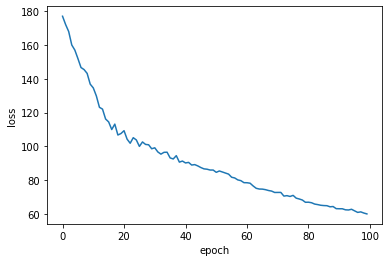

DEBUG:SGD:
Best tree
Migration number: 3.0
Comigration number: 2.0
Seeding site number: 1.0
Neg log likelihood: 15.06
L1: 3.0
Loss: 42.151
DEBUG:SGD:
U > 0.05

DEBUG:SGD:                norm     0     1     2     3     4
primary        0.535 0.000 0.072 0.256 0.000 0.082
locoregional_1 0.197 0.000 0.747 0.000 0.000 0.000
locoregional_2 0.528 0.278 0.000 0.000 0.094 0.000
DEBUG:SGD:
F
DEBUG:SGD:tensor([[0.9444, 0.0000, 0.0716, 0.2559, 0.0000, 0.4095],
        [0.9437, 0.0000, 0.7471, 0.0000, 0.0000, 0.7471],
        [0.8994, 0.2776, 0.0000, 0.0000, 0.3716, 0.3716]],
       grad_fn=<MmBackward0>)


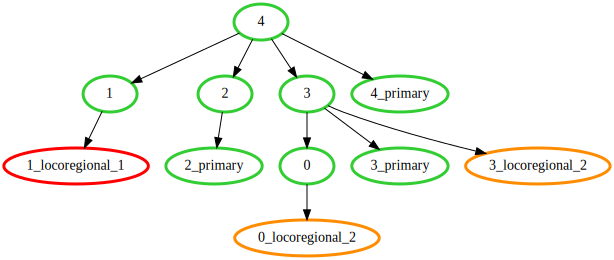

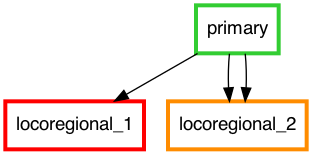

In [6]:
# Patient C
patient = "C"
custom_colors = [matplotlib.colors.to_hex(c) for c in ['limegreen', 'red', 'darkorange', 'purple']]
find_labeling(os.path.join(SANBORN_DATA_DIR, f"{patient}.tree"), os.path.join(SANBORN_DATA_DIR, f"{patient}_0.95.tsv"), custom_colors)



{'0': 0, '1': 1}
{0: '0', 1: '1'}
seen nodes {'1', '0'}
dict_keys(['0', '1'])
['primary', 'lymph_node', 'locoregional_1', 'locoregional_2']


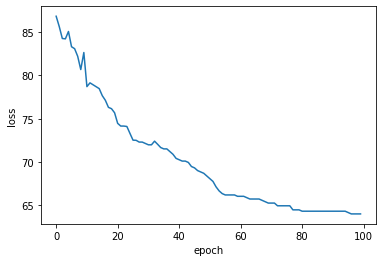

DEBUG:SGD:
Best tree
Migration number: 4.0
Comigration number: 3.0
Seeding site number: 1.0
Neg log likelihood: 3.481
L1: 4.0
Loss: 56.035
DEBUG:SGD:
U > 0.05

DEBUG:SGD:                norm     0     1
primary        0.519 0.000 0.469
lymph_node     0.414 0.547 0.000
locoregional_1 0.221 0.630 0.149
locoregional_2 0.140 0.821 0.000
DEBUG:SGD:
F
DEBUG:SGD:tensor([[0.9873, 0.0000, 0.4687],
        [0.9611, 0.5472, 0.5472],
        [1.0000, 0.6295, 0.7789],
        [0.9606, 0.8210, 0.8210]], grad_fn=<MmBackward0>)


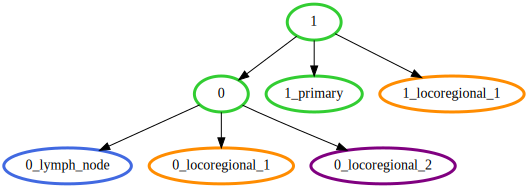

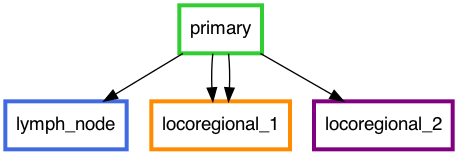

In [8]:
# Patient D
patient = "D"
custom_colors = [matplotlib.colors.to_hex(c) for c in ['limegreen', 'royalblue', 'darkorange', 'purple']]
find_labeling(os.path.join(SANBORN_DATA_DIR, f"{patient}.tree"), os.path.join(SANBORN_DATA_DIR, f"{patient}_0.95.tsv"), custom_colors)



In [9]:
# Patient E
patient = "E"
custom_colors = [matplotlib.colors.to_hex(c) for c in ['limegreen', 'royalblue', 'purple', 'darkorange', 'black']]
find_labeling(os.path.join(SANBORN_DATA_DIR, f"{patient}.tree"), os.path.join(SANBORN_DATA_DIR, f"{patient}_0.95.tsv"), custom_colors)



{'0': 0, '1': 1, '2': 2, '3': 3, '4': 4, '5': 5, '6': 6, '7': 7}
{0: '0', 1: '1', 2: '2', 3: '3', 4: '4', 5: '5', 6: '6', 7: '7'}
seen nodes {'5', '2', '4', '1', '6', '3', '0'}
dict_keys(['0', '1', '2', '3', '4', '5', '6', '7'])
['primary', 'locoregional_1', 'locoregional_2', 'lymph_node', 'locoregional_3']


AssertionError: 

{'0': 0, '1': 1, '2': 2, '3': 3, '4': 4}
{0: '0', 1: '1', 2: '2', 3: '3', 4: '4'}
seen nodes {'2', '4', '14', '1', '3', '0'}
dict_keys(['0', '1', '2', '3', '4'])
['primary', 'lymph_node', 'locoregional', 'distant']


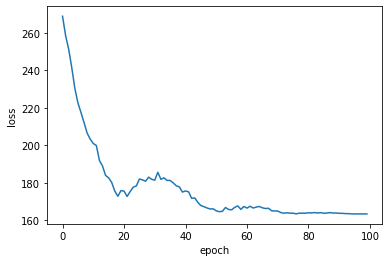

DEBUG:SGD:
Best tree
Migration number: 11.0
Comigration number: 3.0
Seeding site number: 1.0
Neg log likelihood: 231.483
L1: 4.0
Loss: 128.315
DEBUG:SGD:
U > 0.05

DEBUG:SGD:              norm     0     1     2     3     4
primary      0.372 0.099 0.153 0.144 0.105 0.128
lymph_node   0.502 0.091 0.100 0.091 0.079 0.137
locoregional 0.731 0.000 0.065 0.081 0.000 0.000
distant      0.503 0.077 0.090 0.099 0.129 0.102
DEBUG:SGD:
F
DEBUG:SGD:tensor([[1.0000, 0.0988, 0.1528, 0.2965, 0.1049, 0.6278],
        [1.0000, 0.0908, 0.0999, 0.1910, 0.0788, 0.4980],
        [0.8768, 0.0000, 0.0650, 0.1462, 0.0000, 0.1462],
        [1.0000, 0.0772, 0.0901, 0.1888, 0.1294, 0.4974]],
       grad_fn=<MmBackward0>)


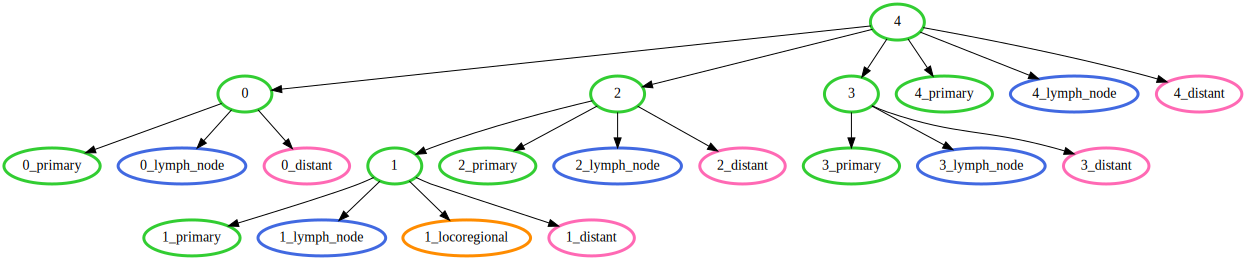

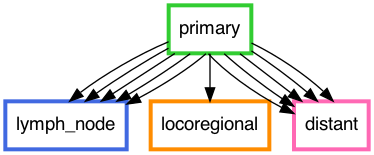

In [10]:
# Patient F
patient = "F"
custom_colors = [matplotlib.colors.to_hex(c) for c in ['limegreen', 'royalblue', 'darkorange', 'hotpink']]
find_labeling(os.path.join(SANBORN_DATA_DIR, f"{patient}.tree"), os.path.join(SANBORN_DATA_DIR, f"{patient}_0.95.tsv"), custom_colors)

